"""
By: Jagrit Aggarwal
Student
Thapar Institute of Engineering & Technology,
Patiala-147001, Punjab, India.

Demo of 'Simple Linear Regression by user defined functions and confirmed by inbuilt function'
"""

In [36]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df=px.data.tips()

In [38]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [39]:
df=df.iloc[:,[0,1]]

In [40]:
df.head(5)

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


tip=B1(total_bill)+B0

In [41]:
data=df.values
data.shape

(244, 2)

In [42]:
data

array([[16.99,  1.01],
       [10.34,  1.66],
       [21.01,  3.5 ],
       [23.68,  3.31],
       [24.59,  3.61],
       [25.29,  4.71],
       [ 8.77,  2.  ],
       [26.88,  3.12],
       [15.04,  1.96],
       [14.78,  3.23],
       [10.27,  1.71],
       [35.26,  5.  ],
       [15.42,  1.57],
       [18.43,  3.  ],
       [14.83,  3.02],
       [21.58,  3.92],
       [10.33,  1.67],
       [16.29,  3.71],
       [16.97,  3.5 ],
       [20.65,  3.35],
       [17.92,  4.08],
       [20.29,  2.75],
       [15.77,  2.23],
       [39.42,  7.58],
       [19.82,  3.18],
       [17.81,  2.34],
       [13.37,  2.  ],
       [12.69,  2.  ],
       [21.7 ,  4.3 ],
       [19.65,  3.  ],
       [ 9.55,  1.45],
       [18.35,  2.5 ],
       [15.06,  3.  ],
       [20.69,  2.45],
       [17.78,  3.27],
       [24.06,  3.6 ],
       [16.31,  2.  ],
       [16.93,  3.07],
       [18.69,  2.31],
       [31.27,  5.  ],
       [16.04,  2.24],
       [17.46,  2.54],
       [13.94,  3.06],
       [ 9.

In [43]:
def summasion_x(val):
    a=0
    x_sum=list()
    for i in range(0,val.shape[0]):
        a=a+val[i][0]
    return a.round(2)

In [44]:
def summasion_y(val):
    a=int()
    y_sum=list()
    for i in range(0,val.shape[0]):
        a=a+val[i][1]
    return a.round(2)
    

In [45]:
def mean_x(val):
    total=summasion_x(val)
    mean_x=total/val.shape[0]
    return mean_x.round(3)

In [46]:
def mean_y(val):
    total=summasion_y(val)
    mean_y=total/val.shape[0]
    return mean_y.round(3)

In [47]:
def sum_x_sub_mean_sq(val):
    m=mean_x(val)
    a=0
    x_xmean=list()
    for i in range(0,val.shape[0]):
        x_xmean.append((val[i][0]-m)**2)
    for i in x_xmean:
        a=a+i
    return a

In [48]:
def summation_x_y(val):
    m_x=mean_x(val)
    m_y=mean_y(val)
    a=0
    x_y=list()
    for i in range(0,val.shape[0]):
        x_y.append((val[i][0]-m_x)*(val[i][1]-m_y))
    for i in x_y:
        a=a+i
    return a

In [49]:
n=summation_x_y(data)
d=sum_x_sub_mean_sq(data)
B1=n/d

In [50]:
B1=B1.round(6)
B1

0.105025

In [51]:
B0=(summasion_y(data)-(B1*summasion_x(data)))/data.shape[0]
B0=B0.round(6)

In [52]:
B0

0.92026

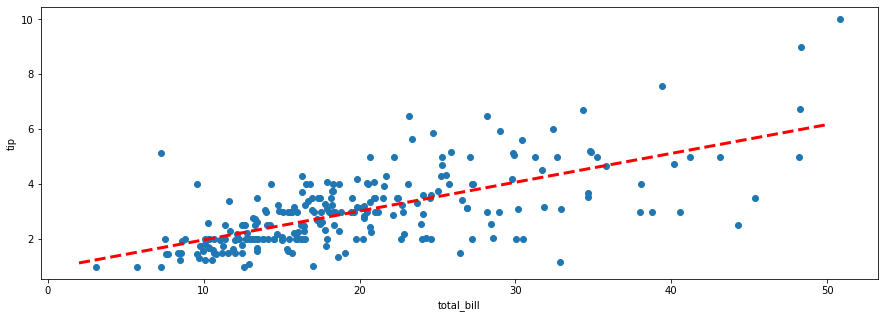

In [53]:
x=np.linspace(2,50,10)
y=B1*x+B0
plt.figure(figsize=(15,5))
plt.scatter(x=df.total_bill,y=df.tip)
plt.plot(x,y,color="red",ls="--",lw=3)
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.show()

R^2=SSR/SST
R^2=1-SSE/SST

SSE=Sum of squares of error(Explained Variability);
SST=Sum of squares total(Total Variability);
SSR=Sum of squares of regression

In [54]:
def SST(val):
    m=mean_y(val)
    a=0
    y_ymean=list()
    for i in range(0,val.shape[0]):
        y_ymean.append(((val[i][1]-m)**2))
    for i in y_ymean:
        a=a+i
    return a.round(2)

In [55]:
def SSE(val):
    a=0
    y_pred=list()
    y_actual=list()
    for i in range(0,val.shape[0]):
        y=B1*val[i][0]+B0
        y_pred.append(y)
        y_actual.append(val[i][1])
    ya_yp=[(x-y)**2 for x,y in zip(y_actual,y_pred)]
    for i in ya_yp:
        a=a+i
    return a.round(2)

In [56]:
def R_suared(val):
    R_sq=1-(SSE(val)/SST(val))
    return R_sq.round(2)

In [57]:
R_suared(data)

0.46

Standard error of estimate is measure of variation of an observation made around computed regression line.

In [58]:
def Standard_error_estimate(val):
    a=SSE(val)
    SEE=(a/(val.shape[0]-2))**0.5
    return SEE

Finding Value of tip based on total bill

In [59]:
tb=float(input("Enter Total Bill paid: "))
expected_tip=B1*tb+B0
print("{} +- {}".format(expected_tip, Standard_error_estimate(data)))

Enter Total Bill paid: 


ValueError: could not convert string to float: ''

# Inbuilt Function

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
regressor=LinearRegression()

In [62]:
y=df["tip"]

In [63]:
y=np.array(y)

In [64]:
x=df["total_bill"]

In [65]:
x=np.array(x)

In [66]:
y=y.reshape(-1,1)

In [67]:
x=x.reshape(-1,1)

In [68]:
regressor.fit(x,y)

LinearRegression()

In [69]:
regressor.coef_

array([[0.10502452]])

In [70]:
regressor.intercept_

array([0.92026961])